# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas

import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t

from statsmodels.stats.proportion import proportions_ztest


# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [2]:
# Your code here:
salaries = pd.read_csv('../data/salaries.csv')
print(len(salaries))


33183


Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:

salaries.head(10)


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
5,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,NaN,50436.0,NaN
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
8,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,103350.0,NaN
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
# Your code here:

salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


In [5]:
salaries.isnull().sum()


Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [6]:
# Your code here:
hourly_emp = salaries.loc[salaries['Salary or Hourly'] == 'Hourly']
salaried_emp = salaries.loc[salaries['Salary or Hourly'] == 'Salary']
print('count hourly employees: ', len(hourly_emp))
print('count salaried employees: ', len(salaried_emp))


count hourly employees:  8022
count salaried employees:  25161


What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [7]:
# Your code here:

salaries.groupby(['Department'])['Name'].count().sort_values(ascending=False)


Department
POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [8]:
# Your code here:



Hourly employees count:  8022
Hourly Rate mean:  32.78855771628128


<AxesSubplot:>

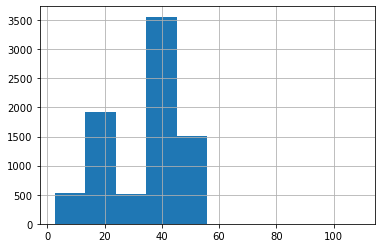

In [9]:
print('Hourly employees count: ', len(hourly_emp))
print('Hourly Rate mean: ', hourly_emp['Hourly Rate'].mean())

hourly_emp['Hourly Rate'].hist()


In [41]:
mean = 30

t_value, p_value = stats.ttest_1samp(hourly_emp['Hourly Rate'], mean)
print('p_value: ', p_value)

0.05 < p_value

# real mean == 30$/h, reject H0 (real mean is different) ¿significantly different? yes, p_value far from 0.05


p_value:  4.3230240486229894e-92


False

In [11]:
mean = 30

t_value, p_value = stats.ttest_1samp(hourly_emp['Hourly Rate'], mean, alternative='greater')
print('p_value: ', p_value)

0.05 < p_value

# real mean < 30$/h, reject H0 (real mean is greater)


p_value:  2.1615120243114947e-92


False

In [12]:
mean = 30

t_value, p_value = stats.ttest_1samp(hourly_emp['Hourly Rate'], mean, alternative='less')
print('p_value: ', p_value)

0.05 < p_value

# real mean > 30$/h, accept H0 (real mean is greater)


p_value:  1.0


True

Sample Hourly employees count:  1000
Sample Hourly Rate mean:  32.7950930299999


<AxesSubplot:>

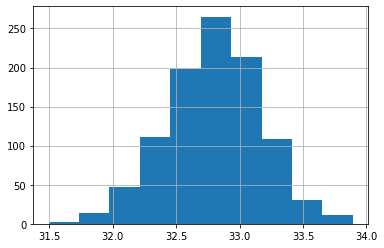

In [13]:
x = 1000
sample_hourly = pd.DataFrame([], columns=['Hourly Rate'])
for i in range(x):
    sample_hourly = pd.concat([sample_hourly, pd.DataFrame([hourly_emp.sample(n=x)['Hourly Rate'].mean()], 
                                                           columns=['Hourly Rate'])])

print('Sample Hourly employees count: ', len(sample_hourly))
print('Sample Hourly Rate mean: ', sample_hourly['Hourly Rate'].mean())

sample_hourly['Hourly Rate'].hist()


We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [14]:
# Your code here:



In [15]:
police_emp = salaries.loc[salaries['Department'] == 'POLICE'] 
police_emp.groupby(['Salary or Hourly'])['Name'].count().sort_values(ascending=False) 
# there are salaried and hourly

Salary or Hourly
Salary    13404
Hourly       10
Name: Name, dtype: int64

In [16]:
# get only salaried employees
police_salaried = salaried_emp.loc[salaried_emp['Department'] == 'POLICE'] 
print(len(police_salaried))
police_salaried.head(2)

13404


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN


Police employees count:  13404
Police Annual Salary mean:  86486.41450313339


<AxesSubplot:>

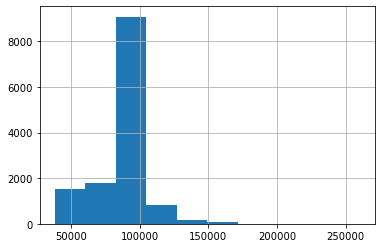

In [17]:
print('Police employees count: ', len(police_salaried))
print('Police Annual Salary mean: ', police_salaried['Annual Salary'].mean())

police_salaried['Annual Salary'].hist()

In [18]:
mean = 86000

t_value, p_value = stats.ttest_1samp(police_salaried['Annual Salary'], mean, alternative='less')
print('p_value: ', p_value)

0.05 < p_value

# real mean > 86000$, accept H0 (real mean is greater than 86000)


p_value:  0.9989698298224517


True

In [19]:
mean = 86000

t_value, p_value = stats.ttest_1samp(police_salaried['Annual Salary'], mean)
print('p_value: ', p_value)

0.05 < p_value

# real mean == 86000$, reject H0 (real mean is different)


p_value:  0.0020603403550965137


False

Using the `crosstab` function, find the department that has the most hourly workers. 

In [20]:
# Your code here:

deparments = pd.crosstab(salaries['Department'], 
                         salaries['Salary or Hourly']).sort_values(by='Hourly', 
                                                                   ascending=False)
deparments

Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336
WATER MGMNT,1513,366
OEMC,1273,829
AVIATION,1082,547
GENERAL SERVICES,765,215
TRANSPORTN,725,415
PUBLIC LIBRARY,299,716
FAMILY & SUPPORT,287,328
CITY COUNCIL,64,347


In [21]:
deparments.loc[deparments['Hourly'] == deparments['Hourly'].max()]

Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [22]:
# Your code here:



In [23]:
# get only hourly employees
streets_san_emp = hourly_emp.loc[hourly_emp['Department'] == 'STREETS & SAN'] 
print(len(streets_san_emp))
streets_san_emp.head(2)

1862


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
21,"ABDUL-SHAKUR, TAHIR",GENERAL LABORER - DSS,STREETS & SAN,F,Hourly,40.0,NaN,21.43


In [24]:
mean = 35

t_value, p_value = stats.ttest_1samp(streets_san_emp['Hourly Rate'], mean, alternative='greater')
print('p_value: ', p_value)

0.05 < p_value

# real mean < 35$/h, accept H0 (real mean is less than 35)


p_value:  1.0


True

STREETS & SAN employees count:  1862
STREETS & SAN Hourly Rate mean:  33.728378088076845


<AxesSubplot:>

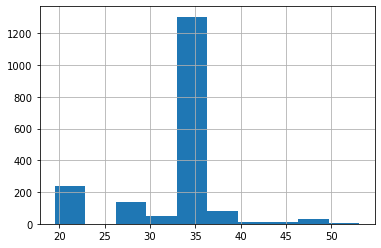

In [25]:
print('STREETS & SAN employees count: ', len(streets_san_emp))
print('STREETS & SAN Hourly Rate mean: ', streets_san_emp['Hourly Rate'].mean())

streets_san_emp['Hourly Rate'].hist()

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [26]:
# Your code here:



In [27]:
hourly_emp['Hourly Rate'].mean()

32.78855771628128

In [28]:
stats.sem(hourly_emp['Hourly Rate'], ddof=-1)

0.13521999931389467

In [29]:
t.interval(0.95, 
           len(hourly_emp['Hourly Rate']) - 1 , 
           loc=hourly_emp['Hourly Rate'].mean(), 
           scale=stats.sem(hourly_emp['Hourly Rate'], ddof=-1))

(32.523491389369234, 33.05362404319333)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [30]:
# Your code here:

t.interval(0.95, 
           len(police_salaried['Annual Salary']) - 1 , 
           loc=police_salaried['Annual Salary'].mean(), 
           scale=stats.sem(police_salaried['Annual Salary'], ddof=-1))


(86177.07939399949, 86795.74961226729)

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [31]:
# Your code here:



In [32]:
t_value, p_value = proportions_ztest(len(hourly_emp), len(salaries), 0.25)
print('p_value: ', p_value)

0.05 < p_value

# different from 25%, reject H0 (is different) ¿significantly different? not much, p_value near 0.05


p_value:  0.0004481127249057967


False

In [33]:
print(len(salaries), len(hourly_emp), (len(salaried_emp)))
print(len(hourly_emp) / len(salaries) * 100)

33183 8022 25161
24.17502938251514
